In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import librosa
audio_file_path='UrbanSound8K/4912-3-1-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [3]:
print(librosa_audio_data)

[0.01123342 0.01544146 0.01119592 ... 0.00160727 0.00196055 0.00191521]


## Extracting MFCCs and Melspectograms 

In [4]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=20)
print(mfccs.shape)

(20, 15)


In [5]:
mfccs

array([[-4.13601868e+02, -3.68995148e+02, -2.50835724e+02,
        -1.34215637e+02, -8.05276108e+01, -7.18988800e+01,
        -8.90449066e+01, -1.16573006e+02, -1.66468292e+02,
        -2.29145752e+02, -2.72492432e+02, -3.06376984e+02,
        -3.30457092e+02, -3.48725525e+02, -3.70532135e+02],
       [ 1.00907669e+02,  1.21785019e+02,  1.70441223e+02,
         1.75290588e+02,  1.67985336e+02,  1.62668549e+02,
         1.76486633e+02,  1.91010437e+02,  1.87682281e+02,
         1.85743011e+02,  1.77764328e+02,  1.62378265e+02,
         1.47892365e+02,  1.32175079e+02,  1.24482239e+02],
       [ 3.36518517e+01,  4.12285461e+01, -2.54097819e-01,
        -4.04409485e+01, -5.84060287e+01, -6.44628372e+01,
        -5.34533157e+01, -3.96366425e+01, -2.90323334e+01,
        -1.95160980e+01, -2.17208934e+00,  9.89764404e+00,
         1.44653893e+01,  1.77889595e+01,  2.69192429e+01],
       [ 3.14916382e+01,  2.31300163e+01, -3.61992979e+00,
        -1.54802303e+01, -3.77723732e+01, -5.42425232

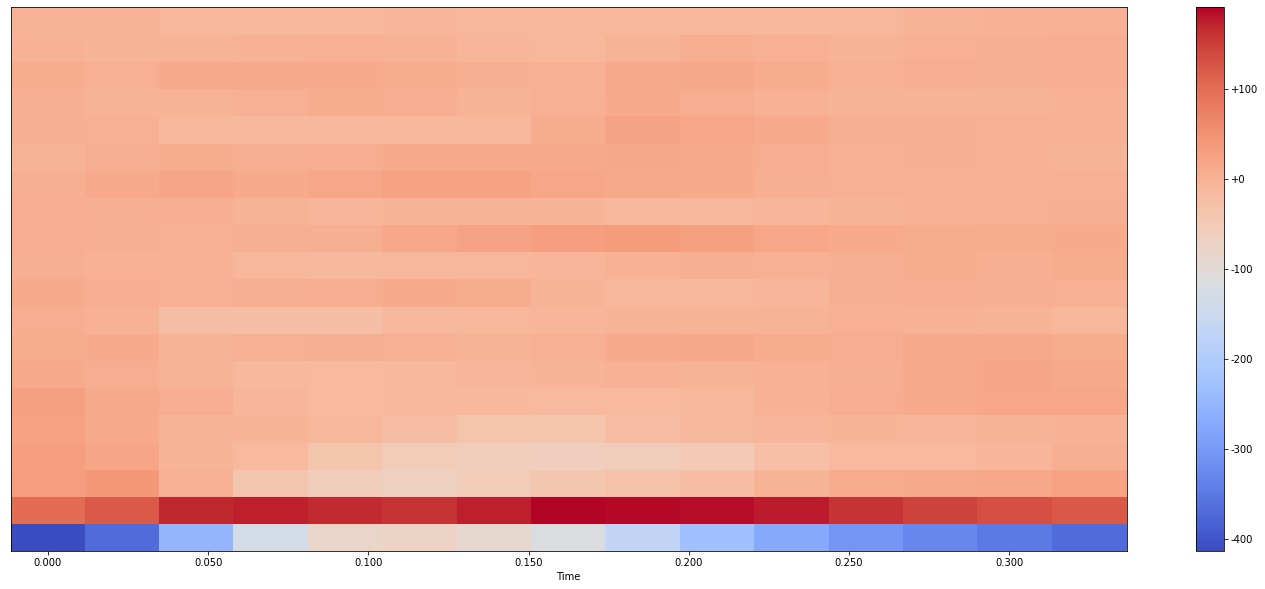

In [6]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=librosa_sample_rate)
plt.colorbar(format="%+2.f")
plt.show()

In [7]:
mls = librosa.feature.melspectrogram(librosa_audio_data, sr=librosa_sample_rate)
print(mls.shape)

(128, 15)


C:\Users\arjun\anaconda3\envs\audio\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass y=[0.01123342 0.01544146 0.01119592 ... 0.00160727 0.00196055 0.00191521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


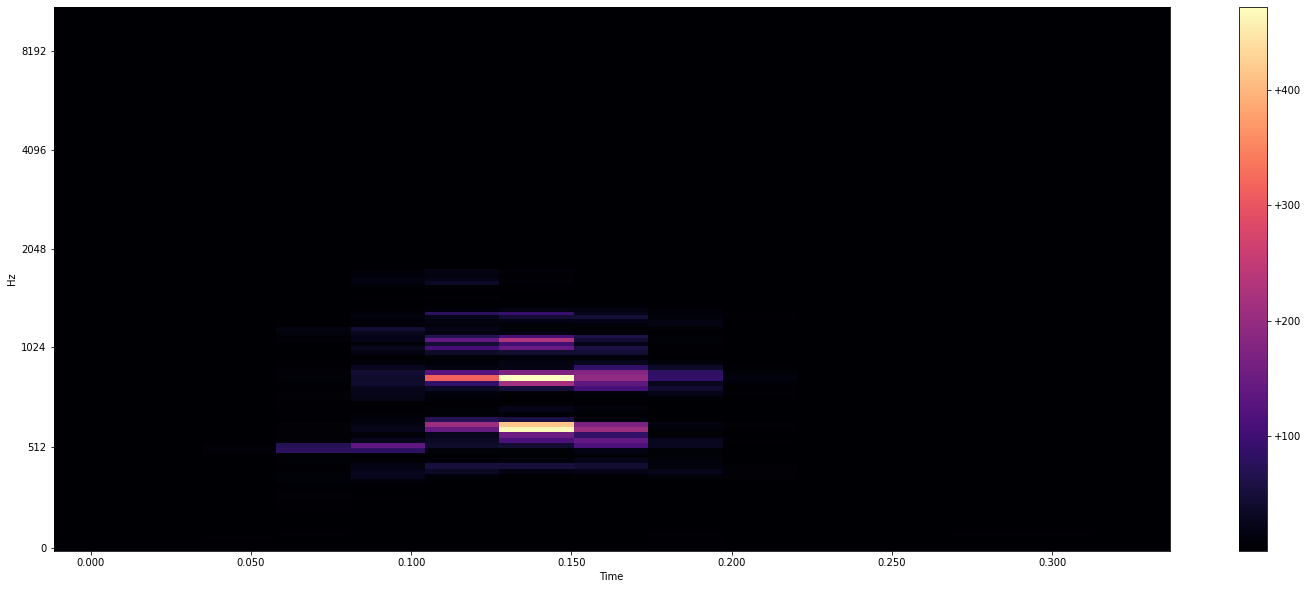

In [8]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mls, 
                         x_axis="time",
                         y_axis="mel",
                         sr=librosa_sample_rate)
plt.colorbar(format="%+2.f")
plt.show()

In [9]:
log_mel_spectogram = librosa.power_to_db(mls)

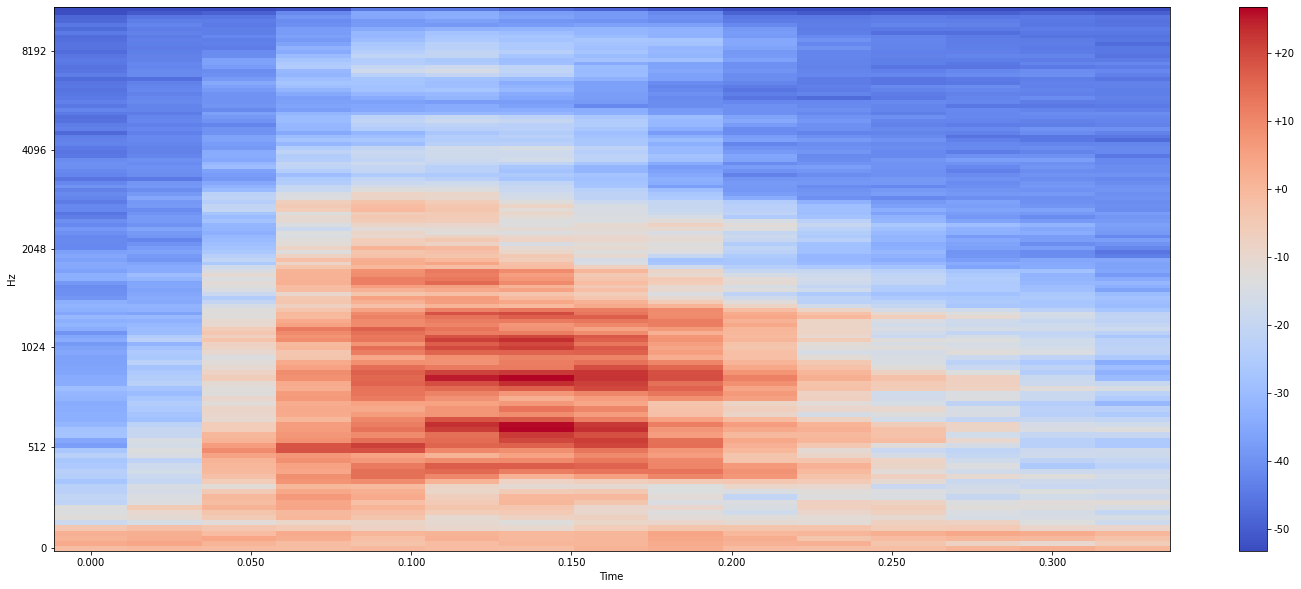

In [10]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectogram, 
                         x_axis="time",
                         y_axis="mel",
                         sr=librosa_sample_rate)
plt.colorbar(format="%+2.f")
plt.show()

In [11]:
#### Extracting MFCC's and MS's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [13]:
def features_extractor1(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    melspec_features = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    melspec_scaled_features = np.mean(melspec_features.T,axis=0)
    
    return melspec_scaled_features

In [14]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [02:57, 26.30it/s]C:\Users\arjun\anaconda3\envs\audio\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [05:45, 36.30it/s]C:\Users\arjun\anaconda3\envs\audio\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\arjun\anaconda3\envs\audio\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [05:59, 24.28it/s]


In [15]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features1=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor1(file_name)
    extracted_features1.append([data,final_class_labels])

8732it [05:06, 28.44it/s]


In [16]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['mfcc_features','class'])
extracted_features_df.head()

,mfcc_features,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045414,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.65685, 54.170742, ...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


In [17]:
extracted_features_df1=pd.DataFrame(extracted_features1,columns=['melspec_features','class'])
extracted_features_df1.head()

,melspec_features,class
0,"[2.3286158e-05, 0.00021360422, 0.00028442565, ...",dog_bark
1,"[0.04961125, 0.04943888, 0.036921527, 0.028673...",children_playing
2,"[0.030885603, 0.02794295, 0.036280595, 0.02579...",children_playing
3,"[0.026434518, 0.032281913, 0.045455463, 0.0329...",children_playing
4,"[0.06138548, 0.040280662, 0.02295008, 0.015539...",children_playing


In [18]:
ff = pd.concat([extracted_features_df, extracted_features_df1], axis=1)

In [19]:
ff.head()

,mfcc_features,class,melspec_features,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark,"[2.3286158e-05, 0.00021360422, 0.00028442565, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045414,...",children_playing,"[0.04961125, 0.04943888, 0.036921527, 0.028673...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing,"[0.030885603, 0.02794295, 0.036280595, 0.02579...",children_playing
3,"[-414.82184, 102.94826, -36.65685, 54.170742, ...",children_playing,"[0.026434518, 0.032281913, 0.045455463, 0.0329...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing,"[0.06138548, 0.040280662, 0.02295008, 0.015539...",children_playing


In [20]:
ff.shape

(8732, 4)

In [21]:
ff = ff.loc[:,~ff.columns.duplicated()]

In [22]:
ff.head()

,mfcc_features,class,melspec_features
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark,"[2.3286158e-05, 0.00021360422, 0.00028442565, ..."
1,"[-425.05234, 110.67095, -54.192833, 62.045414,...",children_playing,"[0.04961125, 0.04943888, 0.036921527, 0.028673..."
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing,"[0.030885603, 0.02794295, 0.036280595, 0.02579..."
3,"[-414.82184, 102.94826, -36.65685, 54.170742, ...",children_playing,"[0.026434518, 0.032281913, 0.045455463, 0.0329..."
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing,"[0.06138548, 0.040280662, 0.02295008, 0.015539..."


In [23]:
ff.shape

(8732, 3)

In [24]:
ff.to_csv('finalfeatures1.csv')

## Independent and Dependent features

In [25]:
X1=np.array(ff['mfcc_features'].tolist())
X2=np.array(ff['melspec_features'].tolist())

In [26]:
X = np.concatenate((X1,X2),axis=1)

In [27]:
y=np.array(ff['class'].tolist())

In [28]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [29]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Train Test Split

In [30]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
X_train

array([[-1.3211458e+02,  1.1391494e+02, -2.3927406e+01, ...,
         9.5076484e-06,  1.2722320e-06,  3.6668476e-07],
       [-1.4296137e+01,  9.1951004e+01, -8.6025953e+00, ...,
         8.2665967e-04,  1.8456977e-04,  3.6639223e-05],
       [-4.9827816e+01,  1.8449375e-01, -2.0364500e+01, ...,
         1.3821023e-02,  7.0661204e-03,  7.8767503e-04],
       ...,
       [-4.2723691e+02,  9.2938087e+01,  2.8287873e+00, ...,
         2.8618877e-07,  1.8706841e-07,  1.6711892e-08],
       [-1.4640692e+02,  1.3716916e+02, -3.4362492e+01, ...,
         9.0331696e-06,  1.9495899e-06,  3.6643581e-07],
       [-4.2171307e+02,  2.1160454e+02,  2.5852380e+00, ...,
         1.7897468e-08,  4.7471733e-09,  2.9412961e-09]], dtype=float32)

In [32]:
X_train.shape

(6985, 168)

In [33]:
X_test.shape

(1747, 168)

In [34]:
y_train.shape

(6985, 10)

In [35]:
y_test.shape

(1747, 10)

## Model Building using NN

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [37]:
### No of classes
num_labels=y.shape[1]

In [38]:
model=Sequential()
###first layer
model.add(Dense(1000,input_shape=(168,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(750))
model.add(Activation('relu'))
###third layer
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###fourth layer
model.add(Dense(250))
model.add(Activation('relu'))
###fifth layer
model.add(Dense(100))
model.add(Activation('relu'))
###sixth layer
model.add(Dense(50))
model.add(Activation('relu'))
###seventh layer
model.add(Dense(50))
model.add(Activation('relu'))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              169000    
_________________________________________________________________
activation (Activation)      (None, 1000)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 750)               750750    
_________________________________________________________________
activation_1 (Activation)    (None, 750)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               375500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0

In [40]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [41]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

training = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 3s 10ms/step - loss: 2.2910 - accuracy: 0.2332 - val_loss: 1.8146 - val_accuracy: 0.3715

Epoch 00001: val_loss improved from inf to 1.81461, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 2s 8ms/step - loss: 1.7367 - accuracy: 0.3865 - val_loss: 1.5031 - val_accuracy: 0.4871

Epoch 00002: val_loss improved from 1.81461 to 1.50307, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 2s 8ms/step - loss: 1.4851 - accuracy: 0.4888 - val_loss: 1.2560 - val_accuracy: 0.5690

Epoch 00003: val_loss improved from 1.50307 to 1.25601, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 2s 8ms/step - loss: 1.3121 - accuracy: 0.5655 - val_loss: 1.1417 - val_accuracy: 0.6405

Epoch 00004: val_loss improved from 1.25601 to 1.14173, saving model to saved_models\audio_cla

219/219 [==============================] - 2s 8ms/step - loss: 0.3133 - accuracy: 0.8986 - val_loss: 0.4114 - val_accuracy: 0.8947

Epoch 00037: val_loss did not improve from 0.37893
Epoch 38/100
219/219 [==============================] - 2s 8ms/step - loss: 0.2935 - accuracy: 0.9034 - val_loss: 0.4065 - val_accuracy: 0.8958

Epoch 00038: val_loss did not improve from 0.37893
Epoch 39/100
219/219 [==============================] - 2s 8ms/step - loss: 0.2769 - accuracy: 0.9105 - val_loss: 0.4408 - val_accuracy: 0.8890

Epoch 00039: val_loss did not improve from 0.37893
Epoch 40/100
219/219 [==============================] - 2s 8ms/step - loss: 0.3107 - accuracy: 0.9011 - val_loss: 0.4152 - val_accuracy: 0.9061

Epoch 00040: val_loss did not improve from 0.37893
Epoch 41/100
219/219 [==============================] - 2s 8ms/step - loss: 0.3020 - accuracy: 0.9038 - val_loss: 0.4190 - val_accuracy: 0.8941

Epoch 00041: val_loss did not improve from 0.37893
Epoch 42/100
219/219 [===========

219/219 [==============================] - 2s 7ms/step - loss: 0.1830 - accuracy: 0.9483 - val_loss: 0.4273 - val_accuracy: 0.9199

Epoch 00078: val_loss did not improve from 0.30507
Epoch 79/100
219/219 [==============================] - 2s 8ms/step - loss: 0.1748 - accuracy: 0.9485 - val_loss: 0.3877 - val_accuracy: 0.9147

Epoch 00079: val_loss did not improve from 0.30507
Epoch 80/100
219/219 [==============================] - 2s 8ms/step - loss: 0.1929 - accuracy: 0.9442 - val_loss: 0.3767 - val_accuracy: 0.9136

Epoch 00080: val_loss did not improve from 0.30507
Epoch 81/100
219/219 [==============================] - 2s 7ms/step - loss: 0.1884 - accuracy: 0.9439 - val_loss: 0.4107 - val_accuracy: 0.9124

Epoch 00081: val_loss did not improve from 0.30507
Epoch 82/100
219/219 [==============================] - 2s 8ms/step - loss: 0.1769 - accuracy: 0.9516 - val_loss: 0.4782 - val_accuracy: 0.9164

Epoch 00082: val_loss did not improve from 0.30507
Epoch 83/100
219/219 [===========

In [42]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9301660060882568


In [43]:
train_hist = pd.DataFrame(training.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.291014,0.233214,1.814608,0.371494
1,1.736666,0.386543,1.503074,0.487121
2,1.485138,0.488762,1.256005,0.568975
3,1.312137,0.565498,1.141733,0.640527
4,1.185189,0.608160,1.003683,0.672582
...,...,...,...,...
95,0.137799,0.960200,0.415921,0.919290
96,0.190034,0.950895,0.339939,0.919863
97,0.152179,0.958482,0.433691,0.923297
98,0.163676,0.955333,0.317934,0.923297


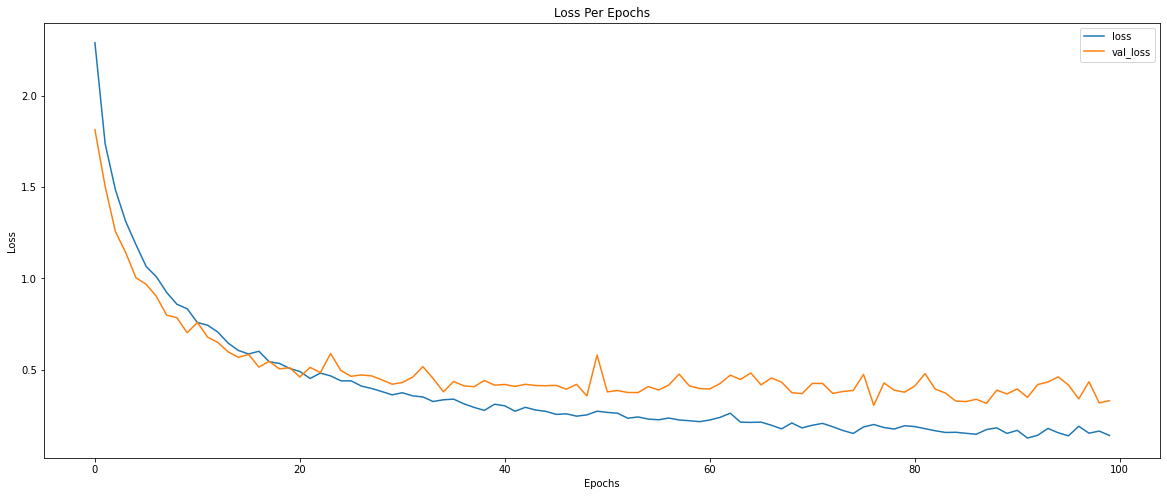

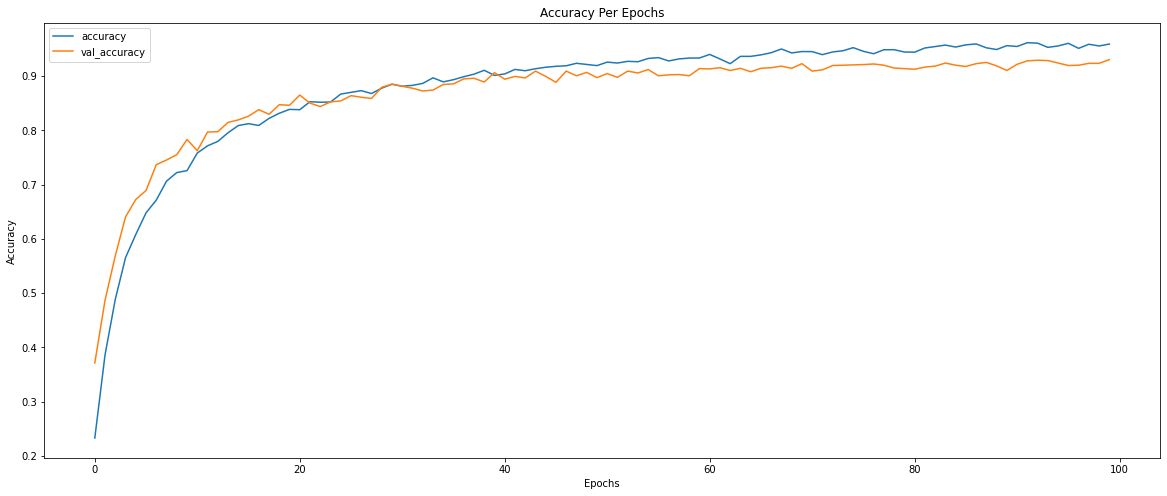

In [44]:
# Plot for accuracy and loss
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['loss','val_loss'])
plt.title('Loss Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[194   0   0   0   0   0   0   0   0   1]
 [  2  81   0   4   0   0   0   2   0   2]
 [  1   0 183   7   2   1   1   0   0  10]
 [  3   0   7 166   1   1   0   0   2   2]
 [  0   0   1   1 187   0   0  10   1   2]
 [  0   1   1   1   0 209   0   0   1   3]
 [  0   0   4   2   1   0  77   0   0   3]
 [  1   0   0   0   0   0   0 184   0   2]
 [  0   0   3   1   0   1   0   0 193   1]
 [  4   0  11   6   3   1   1   5   1 151]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       195
           1       0.99      0.89      0.94        91
           2       0.87      0.89      0.88       205
           3       0.88      0.91      0.90       182
           4       0.96      0.93      0.94       202
           5       0.98      0.97      0.97       216
           6       0.97      0.89      0.93        87
           7       0.92      0.98      0.95       187
           8       0.97      0.

In [48]:
X_test[1]

array([-4.66473267e+02,  1.50166595e+00, -3.44000397e+01,  3.56893997e+01,
       -1.51829252e+01, -1.88839245e+01, -7.57729232e-01, -1.60282173e+01,
       -2.13654728e+01,  7.62013006e+00, -2.90344963e+01, -1.91537743e+01,
       -2.68731928e+00, -8.49319077e+00, -1.47711363e+01, -7.02889204e+00,
       -7.11694431e+00,  8.86893940e+00,  1.49119902e+01,  2.14574661e+01,
        2.13274136e+01,  8.87162924e-01, -1.88103771e+01, -5.01796293e+00,
       -7.05858827e-01,  2.90085340e+00, -6.71102667e+00, -1.66498585e+01,
       -9.83169460e+00,  1.28474321e+01,  6.61924958e-01, -2.39436951e+01,
       -1.51941547e+01,  9.19365692e+00,  1.03997154e+01, -5.99918365e-01,
       -1.25942612e+00,  1.77062073e+01,  1.38310738e+01, -5.16328764e+00,
        1.30101583e-07,  7.81366282e-07,  2.40882127e-06,  1.82150325e-05,
        4.70521700e-05,  4.61496602e-05,  1.23855410e-04,  1.65246005e-04,
        1.50553009e-04,  8.06694268e-04,  5.36288740e-03,  1.03752706e-02,
        2.32313462e-02,  

## Testing Some Test Audio Data

Steps

- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [46]:
filename1="UrbanSound8K/gun_shot.wav"
audio, sample_rate = librosa.load(filename1, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features_test = np.mean(mfccs_features.T,axis=0)
melspec_features = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
melspec_scaled_features_test = np.mean(melspec_features.T,axis=0)

print(mfccs_scaled_features_test)
mfccs_scaled_features_test = mfccs_scaled_features_test.reshape(1,-1)
print(mfccs_scaled_features_test.shape)
print(melspec_scaled_features_test)
melspec_scaled_features_test = melspec_scaled_features_test.reshape(1,-1)
print(melspec_scaled_features_test.shape)

test = np.concatenate((mfccs_scaled_features_test,melspec_scaled_features_test), axis=1)
print(test)
print(test.shape)

[-3.6774091e+02  5.7886475e+01  2.0891094e+00  1.4153268e+00
 -7.7920790e+00  8.6375570e-01 -9.4214356e-01  6.8959389e+00
  3.3859668e+00  7.5922570e+00  1.3376027e+00  4.0084863e+00
 -5.8185083e-01  2.9293549e+00  5.0941993e-02  1.6413888e+00
 -1.4976832e+00  3.5523599e-01 -1.0135609e+00  5.1873273e-01
 -5.1905262e-01  9.4669908e-01 -2.7711585e-01  5.3729326e-01
 -3.6401618e-01  4.8845655e-01 -3.2469752e-01  9.0416443e-01
  7.1955830e-01  1.1760567e+00  1.2735413e-01  2.2823544e-01
  2.9349366e-01  8.4571576e-01  1.4269739e-01  2.3434192e-01
 -8.3371097e-01 -7.8424913e-01 -3.8361678e-01  4.7393393e-02]
(1, 40)
[6.75287933e+01 8.47472382e+00 1.21656694e+01 5.55515766e+00
 2.56586957e+00 1.61552095e+00 6.85011864e-01 6.18156791e-01
 6.03074014e-01 9.13435340e-01 6.67138100e-01 2.42444187e-01
 2.05006704e-01 3.26063842e-01 5.85045755e-01 2.92889953e-01
 1.66115507e-01 3.64973575e-01 5.96290946e-01 7.99625158e-01
 4.88225937e-01 2.25069657e-01 1.16198254e+00 1.46126068e+00
 1.08605230e+00

In [47]:
predicted_label=model.predict_classes(test)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[6]


C:\Users\arjun\anaconda3\envs\audio\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['gun_shot'], dtype='<U16')

In [49]:
filename1="UrbanSound8K/drilling.wav"
audio, sample_rate = librosa.load(filename1, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features_test = np.mean(mfccs_features.T,axis=0)
melspec_features = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
melspec_scaled_features_test = np.mean(melspec_features.T,axis=0)

print(mfccs_scaled_features_test)
mfccs_scaled_features_test = mfccs_scaled_features_test.reshape(1,-1)
print(mfccs_scaled_features_test.shape)
print(melspec_scaled_features_test)
melspec_scaled_features_test = melspec_scaled_features_test.reshape(1,-1)
print(melspec_scaled_features_test.shape)

test = np.concatenate((mfccs_scaled_features_test,melspec_scaled_features_test), axis=1)
print(test)
print(test.shape)

[-120.31033      11.803151    -96.87232      13.434951    -25.093641
    7.759178     -1.9562967     5.836077    -15.186464     27.913494
   -9.512876     10.787195    -10.905972     10.184161    -14.92184
   18.419968      0.62037504   11.533897      2.4414968     8.90594
    2.9405987     5.0056996     3.8541112     8.625504     -1.61779
    4.098317     -1.4020041     0.24123287    0.16021642    8.815267
   -3.4592052    -1.5790246    -3.9767752     4.496427     -4.3054314
    3.1692314    -0.71744335   -0.4778388    -0.87671804    3.5477564 ]
(1, 40)
[1.6346432e-01 5.5565484e-02 1.2075245e-02 7.9839388e-03 7.0523662e-03
 5.5521806e-03 6.3971560e-03 5.0398903e-03 4.6671042e-03 9.2853354e-03
 3.4383073e-02 2.3741071e-01 2.1798840e-01 3.1266179e-02 5.8067467e-02
 5.0619289e-02 5.1175784e-02 5.1823009e-02 5.1078543e-02 7.0668750e-02
 4.9172882e-02 4.8144422e-02 1.0954584e-01 1.2704074e-01 1.8688841e-01
 2.3400679e-01 3.0047393e-01 4.6340838e-01 9.4715452e-01 7.7921879e-01
 4.4291821e-0

In [50]:
predicted_label=model.predict_classes(test)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[4]


array(['drilling'], dtype='<U16')

In [ ]:
filename1="UrbanSound8K/.wav"
audio, sample_rate = librosa.load(filename1, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features_test = np.mean(mfccs_features.T,axis=0)
melspec_features = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
melspec_scaled_features_test = np.mean(melspec_features.T,axis=0)

print(mfccs_scaled_features_test)
mfccs_scaled_features_test = mfccs_scaled_features_test.reshape(1,-1)
print(mfccs_scaled_features_test.shape)
print(melspec_scaled_features_test)
melspec_scaled_features_test = melspec_scaled_features_test.reshape(1,-1)
print(melspec_scaled_features_test.shape)

test = np.concatenate((mfccs_scaled_features_test,melspec_scaled_features_test), axis=1)
print(test)
print(test.shape)